# Titanic Survival Prediction data science project

This file is meant to explain the different steps of this project.

In [1]:
# Import librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


### Loading the data
Here the data (that comes from Kaggle) is already split into two datasets:
- **train** is meant for training
- **test** is meant for testing

In [2]:
# Importing the dataset
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

## **Exploratory Data Analysis (EDA)**

The EDA is usefull to get an overview of the data provided: get a look at the first few rows, the different types, missing values...
It is also useful to create visualisations, to analyse the correlation between the different columns. In this case, how age, gender, passenger class, etc. affects the survival rates.
Useful to have an idea of the ranges of the variables to identify outliers.

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Notice training and test are built the same way. That was expected. The following data analysis will therefore be done on the training dataset only. We should be able to expect the same range of results in the testing dataset. 

If the model predictions are very efficient on the training dataset but only little on the testing dataset, we might have to go back to data analysis on the testing dataset (of course there can be other reasons explaining such results: overfitting...).

In [4]:
print("Summary of the columns, emptiness and types")
train.info()
print()
print("-------")
print()
print("Summary statistics for numerical columns ")
train.describe()

Summary of the columns, emptiness and types
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

-------

Summary statistics for numerical columns 


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Data Cleaning and Preprocessing**

#### Dealing with missing values

In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns have missing values. There are different ways to tackle the issue.
- The first one is to drop the rows with missing values. This leads to loss of data, but in a large dataset, dropping a few rows isn't as consequent as it is for a small dataset.
- The second one is to inpute the missing data. Either with the mean of the corresponding value, or with a constant value.
- The third one is to use classification or regression models to fill in the missing data.

To have more insights on the correlation of survival rates and other data, we'll do some data visualisation.

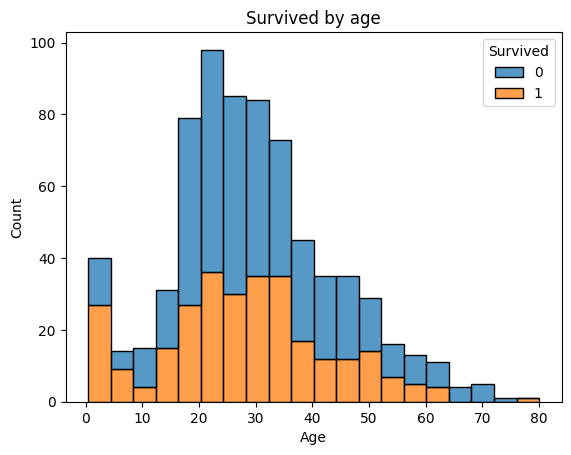

In [68]:
sns.histplot(data=train, x='Age', hue='Survived', multiple='stack')
plt.title('Survived by age')

plt.savefig("./data_analysis_plots/survived_by_age")

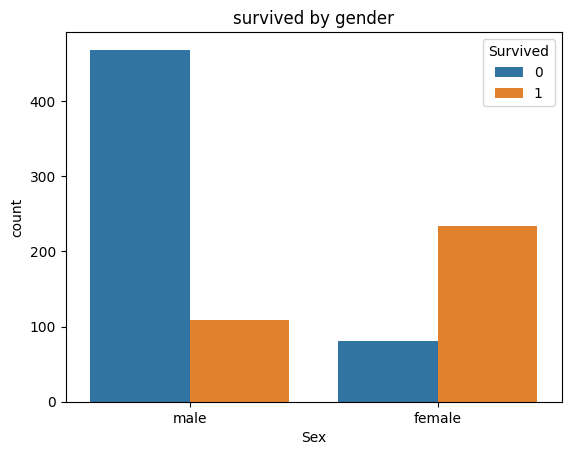

In [69]:
sns.countplot(data=train, x='Sex', hue='Survived')
plt.title('survived by gender')
plt.savefig("./data_analysis_plots/survived_by_sex")

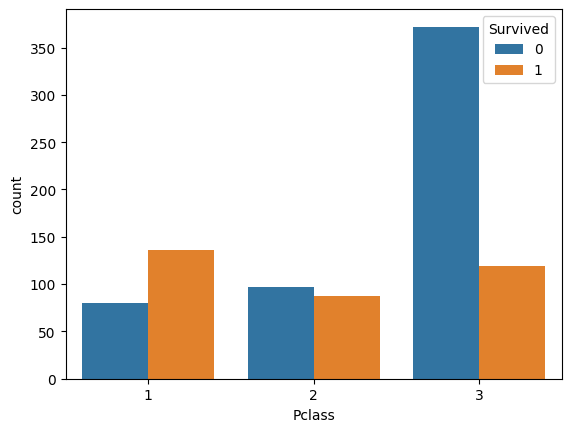

In [70]:
sns.countplot(data=train, x='Pclass', hue='Survived')
plt.savefig("./data_analysis_plots/survived_by_passenger_class")

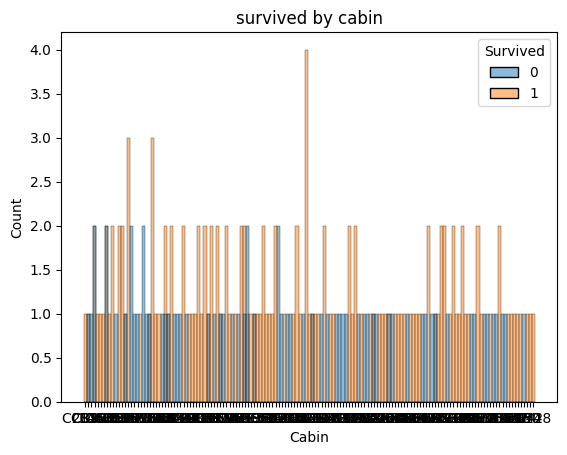

In [71]:
sns.histplot(data=train, x='Cabin', hue='Survived')
plt.title('survived by cabin')
plt.savefig("./data_analysis_plots/survived_by_cabin")

<AxesSubplot:xlabel='Embarked', ylabel='count'>

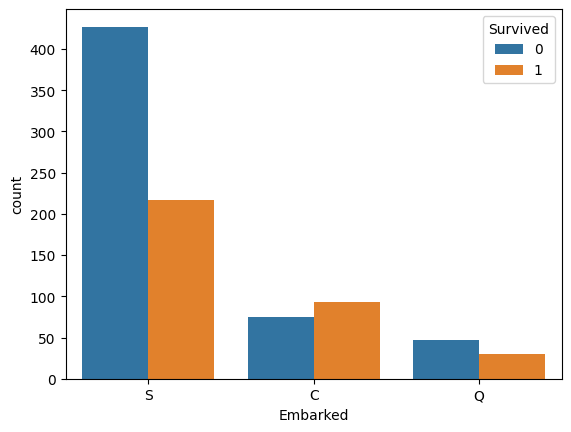

In [72]:
sns.countplot(data=train, x='Embarked', hue='Survived')

The plots show the age, gender and passenger class are important for the survived outcome, meanwhile the cabin data isn't complete enough to draw conclusions. It might eventually result in granularity loss of the predictive model, but we'll chose to discard this column. 

To confirm this data cleaning, we proceed by doing a correlation heatmap. This will allow us to have an overview on which data has the most impact on survival rates. 
To do this, we must convert categorical data: this means converting columns like sex and embark to numerical values.
What we will do is this:

**Sex**
- Female -> 1
- Male -> 0

**Embarked**
- S -> 0
- C -> 1
- Q -> 2

<Axes: >

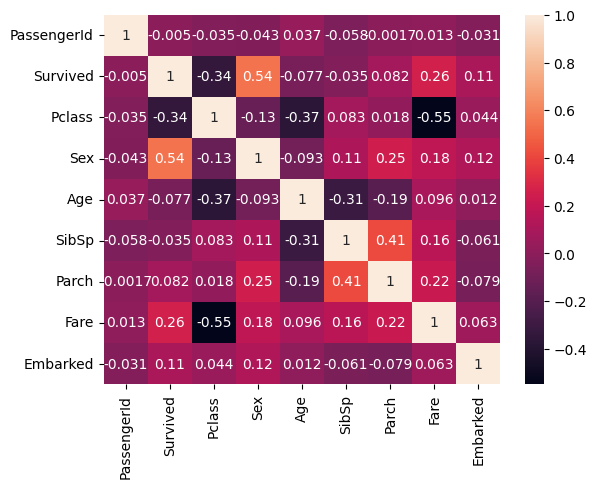

In [3]:
train_tmp = train.drop(['Name', 'Ticket', 'Cabin'], axis=1)
train_tmp['Sex'] = train_tmp['Sex'].map({'male':0, 'female':1})
train_tmp['Embarked'] = train_tmp['Embarked'].map({'S':0, 'C':1, 'Q':2})


sns.heatmap(train_tmp.corr(), annot=True)

### Heatmap -variable correlation- analysis

#### Theoretical explanations
First of all, correlation ranges from -1 to 1.
Then, the closer the value is from -1 or 1, the higher the correlation is, between the variables.
For positive numbers, if one increase, the other does too.
For negative numbers, if one decreases, the other increases.

#### Analysis of the heatmap results
The following variables are ordered by descending order of correlation, for both positive and negative values.

**Positive Values**:
- Sex
- Fare
- Embarked
- Parch - _Negligible (at first at least)_

**Negative Values**:
- Passenger class
- Age - _Negligible (at first at least)_
- Sibsp - _Negligible (at first at least)_

#### Feature engineering

We could also be tempted to join Sibsp and Parch to create a family to gain in granularity.
We will keep that idea aside for now, but may get back to it.


Here, we will:
- drop the missing embarked rows (2 rows, negligible loss of data).
- fill in empty age fields with the mean age of passengers

In [4]:
# Keep the columns we need for the model
train['Sex'] = train['Sex'].map({'male':0, 'female':1})
train['Embarked'] = train['Embarked'].map({'S':0, 'C':1, 'Q':2})

# Drop rows with missing Embraked values
train = train.dropna(subset=['Embarked'])

# Fill missing age values with the mean
train['Age'] = train['Age'].fillna(train['Age'].mean())

train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

The data should now be clean, and ready to be processed by the model. The last step before selecting the model is to divide the train dataset into two seperate datasets. One to train the model, the other one to test it.

Usually, a dataset is seperated into 70 to 80% training and 20 to 30% testing. We'll abide by these proportions.

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(train[['Pclass', 'Age', 'SibSp', 'Sex', 'Embarked']], train['Survived'], test_size=0.3, random_state=0)
print(x_train)

     Pclass        Age  SibSp  Sex  Embarked
351       1  29.642093      0    0       0.0
125       3  12.000000      1    0       1.0
578       3  29.642093      1    1       1.0
423       3  28.000000      1    1       0.0
119       3   2.000000      4    1       0.0
..      ...        ...    ...  ...       ...
837       3  29.642093      0    0       0.0
193       2   3.000000      1    0       0.0
630       1  80.000000      0    0       0.0
560       3  29.642093      0    0       2.0
685       2  25.000000      1    0       1.0

[622 rows x 5 columns]


It is now time to choose the adapted predictive model.

Since the purpose of this project is to gain skills in model building and tuning, we will build several of them.
Then, we will make an analysis of the results, and cross validate the results. We should then be able to determine which model suits the best (Reminder: Linear Regression and other similar models aren't adapted here. The ouput is expected to be binary and not continuous.)

For now, let's start with Logistic Regression.

## **Logistic Regression**

### Logistic Regression Characteristics

- **Output Type**: Predicts probabilities between 0 and 1.
- **Use Case**: Used for classification problems. Ideal for binary problems.
- **Equation Form**: 
  `p = 1 / (1 + exp(-(β0 + β1*x1 + ... + βn*xn)))`
- **Model Output**: Outputs a probability, then converts it to a class (0 or 1).
- **Range of Predictions**: Outputs values between 0 and 1 (probabilities).


#### **Applying the theorie to our project**

First, we will apply the simple method. The _y_ variable will represent the survival rates, x will represent the gender.

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
SLR = LogisticRegression()
# Fit the model on the training data with only the column Sex and Survived
x_train_sex = x_train.iloc[:,3].values.reshape(-1,1)
SLR.fit(x_train_sex, y_train)

print("Accuracy on the training dataset: " + str(SLR.score(x_train_sex, y_train)))  # Accuracy

Accuracy on the training dataset: 0.7942122186495176


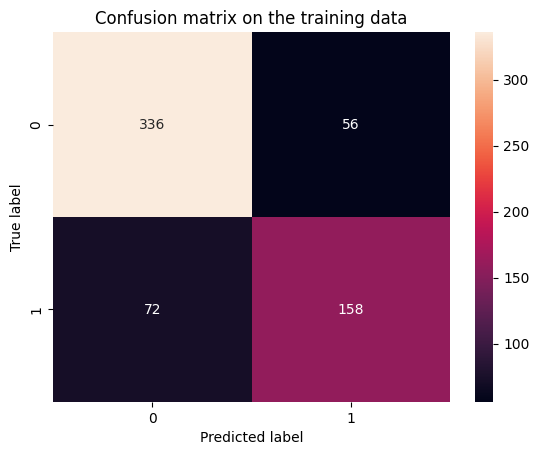

In [79]:
# Let's now display the confusion matrix to see how well the model performed on the training data

y_train_prediction = SLR.predict(x_train_sex)

sns.heatmap(sk.metrics.confusion_matrix(y_train, y_train_prediction), annot=True, fmt='d')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the training data')
plt.savefig("./data_analysis_plots/confusion_matrix_training_data")
plt.show()


We have checked, the accuracy shown by the confusion matrix is the same as the model, as expected.

Here, we can see several things:
- 336 passengers were correctly classified as not survived. These represent the True Negatives.
- 158 passengers were correctly classified as survived. These represent the True Positives.
- 72 passengers were wrongly classified as not survived. These represent the False Negatives.
- 56 passengers were wrongly classified as survived. These represent the False Positives.

The accuracy is 0.78, which isn't too bad. But we can do better.

Let's have a look at other performance metrics. We'll start with the precision, recall and F1 score.

- **Precision**: The number of True Positives divided by the number of True Positives and False Positives. It is the ability of the classifier not to label as positive a sample that is negative.


In [80]:
precision = sk.metrics.precision_score(y_train, y_train_prediction)
print("Precision on the training data: " + str(precision))

Precision on the training data: 0.7383177570093458


In our case, the precision isn't the most important metric.
With the given context, it is more important to find the False Negatives and True Positives. 
Of course, from a budget point of vue, it was better at the time to focus on the False negatives and so lower the false positives rate.

This is where the recall comes in.

- **Recall** (Sensitivity): The number of True Positives divided by the number of True Positives and the number of False Negatives. It is the ability of the classifier to find all the positive samples.

In [81]:
recall = sk.metrics.recall_score(y_train, y_train_prediction)
print("Recall: " + str(recall))

Recall: 0.6869565217391305


The recall value is of 0.69. It means the model is able to find 69% of the positive values.
The recall isn't very good. It means the model is not able to find 31% of the positive values.
In other words, the model is not able to find 31% of the passengers that survived.

- **F1 Score**: The weighted average of Precision and Recall. It takes both false positives and false negatives into account. It is the harmonic mean of the precision and recall.

In [82]:
f1 = sk.metrics.f1_score(y_train, y_train_prediction)
print("F1 score: " + str(f1))

F1 score: 0.7117117117117117


The F1 score is of 0.71. A high (close to 1) F1 score means that the dataset is balanced between recall and precision. The amount of False Negatives is yet a little higher than the amount of False Negatives, explaining the F1 score.

Let's try predicting some values from the test dataset and display them, to check whether or not the model is efficient on another dataset. Bear in mind that it may not be, as it could be overfitting or underfitting.

In [83]:
# Try to predict the survival rates based on the sex, from the test data
x_test_sex = x_test.iloc[:,3].values.reshape(-1,1)
y_test_prediction = SLR.predict(x_test_sex)

print("Accuracy on test dataset: " + str(SLR.score(x_test_sex, y_test)))  # Accuracy

Accuracy on test dataset: 0.7677902621722846


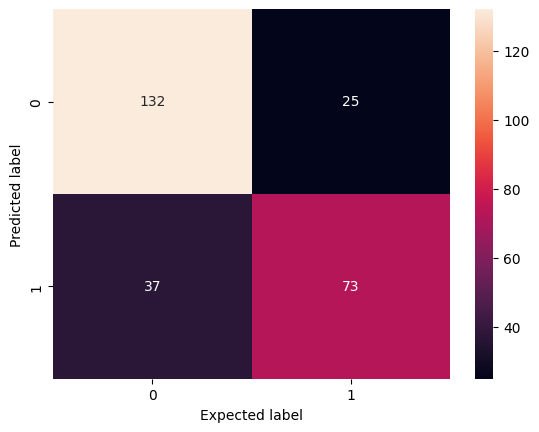

In [84]:
# Let's now display the confusion matrix to see how well the model performed on the test data, in the case of the simple model with only sex as a feature

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_prediction), annot=True, fmt='d')
plt.ylabel('Predicted label')
plt.xlabel('Expected label')

plt.savefig("./data_analysis_plots/confusion_matrix_SLR_Gender")

Let's calculate the different metrics used previously.

In [85]:
precision = sk.metrics.precision_score(y_test, y_test_prediction)
recall = sk.metrics.recall_score(y_test, y_test_prediction)
f1 = sk.metrics.f1_score(y_test, y_test_prediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.7448979591836735
Recall: 0.6636363636363637
F1 Score: 0.7019230769230769


The results are of the same range of values. There doesn't seem to be any noticeable over/underfitting. We may have to try another model. But before that, obviously the survival rates don't only depend on the Gender; let's take more data into the parameters.

Accuracy on the training dataset: 0.8247588424437299


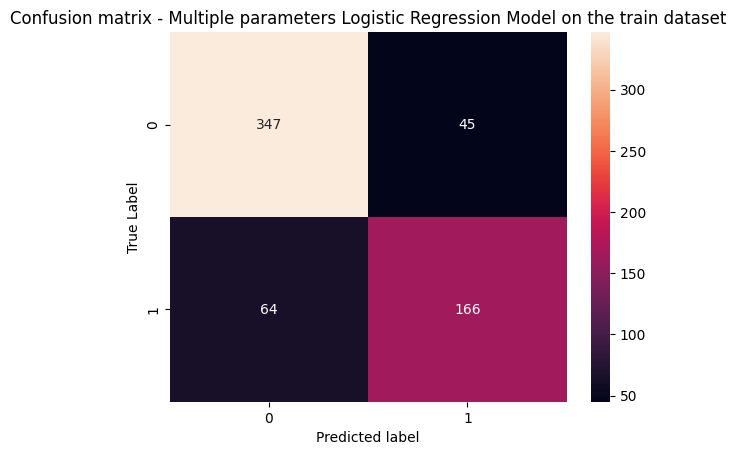

In [86]:
MLR = LogisticRegression()
# Fit the model on the training data
MLR.fit(x_train, y_train)

print("Accuracy on the training dataset: " + str(MLR.score(x_train, y_train)))  # Accuracy

y_train_mprediction = MLR.predict(x_train)

sns.heatmap(sk.metrics.confusion_matrix(y_train, y_train_mprediction), annot=True, fmt= 'd')
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion matrix - Multiple parameters Logistic Regression Model on the train dataset")
plt.savefig("./data_analysis_plots/confusion_matrix_train_MLR")
plt.show()


In [87]:
precision = sk.metrics.precision_score(y_train, y_train_mprediction)
recall = sk.metrics.precision_score(y_train, y_train_mprediction)
f1 = sk.metrics.f1_score(y_train, y_train_mprediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.7867298578199052
Recall: 0.7867298578199052
F1 Score: 0.7528344671201814


The recall score is better. The accuracy also is slightly - very slightly :') - better.
Let's test the model on the testing dataset.

Accuracy: 0.7677902621722846


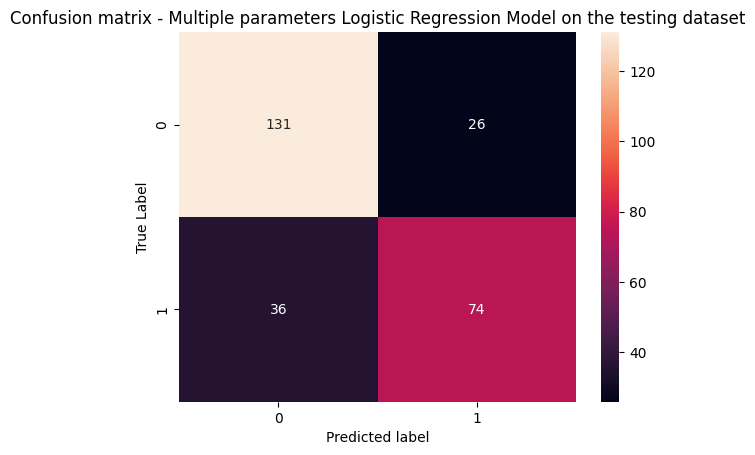

In [88]:
y_test_mprediction = MLR.predict(x_test)
print("Accuracy: " + str(sk.metrics.accuracy_score(y_test, y_test_mprediction)))

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_mprediction), annot=True, fmt='d')
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion matrix - Multiple parameters Logistic Regression Model on the testing dataset")
plt.savefig("./data_analysis_plots/confusion_matrix_test_MLR")
plt.show()

The accuracy score is once again slightly better than with simple logistic regression.


In [89]:
precision = sk.metrics.precision_score(y_test, y_test_mprediction)
recall = sk.metrics.precision_score(y_test, y_test_mprediction)
f1 = sk.metrics.f1_score(y_test, y_test_mprediction)

print("Precision: " + str(precision))
print("Recall: " + str(recall))
print("F1 Score: " + str(f1))

Precision: 0.74
Recall: 0.74
F1 Score: 0.7047619047619048


These results are also increasing. This is expected: We determined earlier that there was a correlation between the passenger class, gender, etc. and survival rates.
Therefore, the model, when taking into account these parameters, is able to predict better.

Let's plot the ROC curve

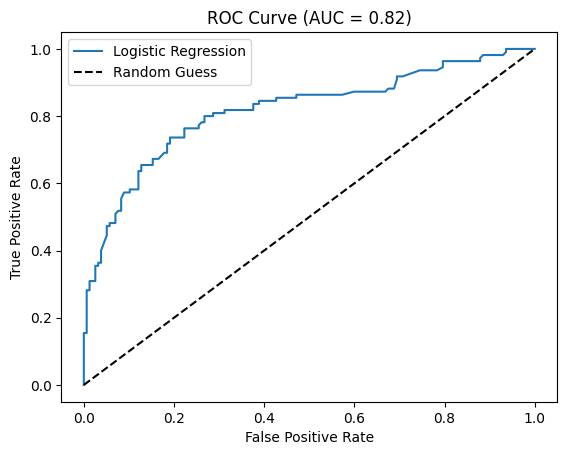

In [90]:
# ROC Curve plot
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, MLR.predict_proba(x_test)[:,1]) # false positive rate, true positive rate, thresholds

# Calculate the AUC score
auc_score = roc_auc_score(y_test, MLR.predict_proba(x_test)[:,1])

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'k--')
plt.legend(['Logistic Regression', 'Random Guess'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.savefig("./data_analysis_plots/ROC_curve")
plt.show()

As expected the ROC curve is quite good. The AUC is of 0.82 (supposed to be between 0.5 and 1), which is a good score. The model is able to predict the survival rates well.


We could be tempted to optimize the model, by tuning the hyperparameters.
We won't do it here, since it may not be the best model for this dataset. We will try other models first.

## **K-Nearest Neighbors (KNN)**

### K-Nearest Neighbors Characteristics
- **Output Type**: Class label.
- **Use Case**: Used for classification problems.

#### **Applying the theorie to our project**

We will start by using the KNN model with the default parameters.


In [157]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=2, p=2)
knn.fit(x_train, y_train)
print("Accuracy on the training dataset: " + str(knn.score(x_train, y_train)))

Accuracy on the training dataset: 0.887459807073955


The accuracy on the training subset is of 0.89 which is quite good - better than the logistic regression model.
Let's try the model on the testing dataset.

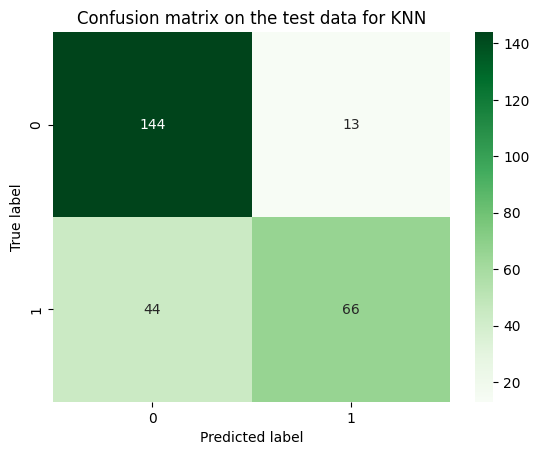

Accuracy on the test dataset: 0.7865168539325843


In [158]:
# Test the model on the test data
y_test_knn_prediction = knn.predict(x_test)
accuracy_knn_test = sk.metrics.accuracy_score(y_test, y_test_knn_prediction)

sns.heatmap(sk.metrics.confusion_matrix(y_test, y_test_knn_prediction), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix on the test data for KNN')
plt.savefig("./data_analysis_plots/confusion_matrix_test_KNN")
plt.show()

print("Accuracy on the test dataset: " + str(accuracy_knn_test))

The model may be overfitting. We will try to tune the hyperparameters to see if we can get better results.
We will use the elbow method to do so.

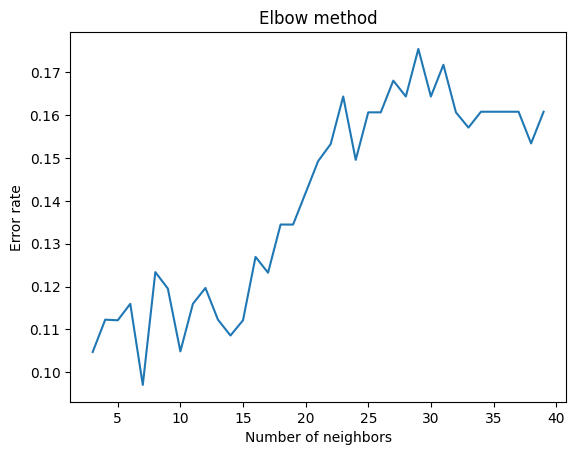

In [159]:
# Elbow method to find the best number of neighbors
from sklearn.model_selection import cross_val_score

error_rate = []

for i in range(3,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x_test, y_test_knn_prediction, cv=10)
    error_rate.append(1-score.mean())
    
plt.plot(range(3, 40), error_rate)
plt.xlabel('Number of neighbors')
plt.ylabel('Error rate')
plt.title('Elbow method')
plt.savefig("./data_analysis_plots/knn_elbow_method")
plt.show()


In [161]:
print(error_rate)
print("The best number of neighbors is: " + str(error_rate.index(min(error_rate)) + 1))

[0.10470085470085466, 0.11225071225071237, 0.1121082621082623, 0.11595441595441591, 0.097008547008547, 0.12336182336182344, 0.11951566951566961, 0.10484330484330473, 0.11595441595441591, 0.11965811965811979, 0.11225071225071237, 0.1085470085470085, 0.11210826210826208, 0.12692307692307703, 0.12321937321937315, 0.1344729344729345, 0.1344729344729345, 0.14188034188034193, 0.14928774928774935, 0.15327635327635336, 0.16438746438746443, 0.1495726495726496, 0.16068376068376078, 0.16068376068376078, 0.16809116809116809, 0.16438746438746443, 0.1754985754985755, 0.16438746438746443, 0.17179487179487185, 0.16068376068376078, 0.1571225071225072, 0.16082621082621085, 0.16082621082621085, 0.16082621082621085, 0.16082621082621085, 0.15341880341880343, 0.16082621082621085]
The best number of neighbors is: 5


The elbow method may not be the best method to determine the best value for K. We will try different values and see which one gives the best results.
He can try do it manually.

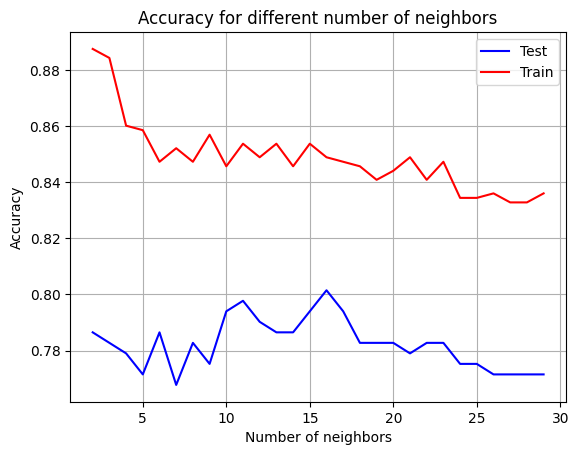

In [162]:
accuracyListtest = []
accuracyListtrain = []

for k in range(2, 30):
    knn_test = KNeighborsClassifier(n_neighbors=k)
    knn_test.fit(x_train, y_train)
    
    accuracy_knn_test__ = knn_test.score(x_train, y_train)
    accuracyListtrain.append(accuracy_knn_test__)
    
    y_test_knn_prediction_ = knn_test.predict(x_test)
    
    accuracy_knn_test_ = sk.metrics.accuracy_score(y_test, y_test_knn_prediction_)
    accuracyListtest.append(accuracy_knn_test_)
    

plt.plot(range(2, 30), accuracyListtest, color = 'blue')
plt.plot(range(2, 30), accuracyListtrain, color = 'red')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy for different number of neighbors')
plt.legend(['Test', 'Train'])
plt.savefig("./data_analysis_plots/knn_accuracy")
plt.show()

    

## Neural Networks

In this chapter, we will apply implement 2 neural networks for three main purposes:
- Gain experience on useful librairies (TensorFlow, PyTorch, etc.)
- Evaluate model effectiveness in our case, compared to the models implemented previously
- Evaluate the [neural network](#https://github.com/Gdeterline/Neural-Network-Build/blob/main/README.md) we built compared to those from famous libraries. 

In [10]:
import sys
sys.path.insert(0, './Documents/GitHub/Neural-Network-Build/')
